In [13]:
import pandas as pd
import numpy as np

file_path = '/content/ett.csv'
data = pd.read_csv(file_path)

# Displaying the first few rows of the dataset and the summary statistics
data_head = data.head()
data_description = data.describe()

data_head, data_description


(                  date   HUFL   HULL   MUFL   MULL   LUFL   LULL         OT
 0  2016-07-01 00:00:00  5.827  2.009  1.599  0.462  4.203  1.340  30.531000
 1  2016-07-01 01:00:00  5.693  2.076  1.492  0.426  4.142  1.371  27.787001
 2  2016-07-01 02:00:00  5.157  1.741  1.279  0.355  3.777  1.218  27.787001
 3  2016-07-01 03:00:00  5.090  1.942  1.279  0.391  3.807  1.279  25.044001
 4  2016-07-01 04:00:00  5.358  1.942  1.492  0.462  3.868  1.279  21.948000,
                HUFL          HULL          MUFL          MULL          LUFL  \
 count  17420.000000  17420.000000  17420.000000  17420.000000  17420.000000   
 mean       7.375141      2.242242      4.300239      0.881568      3.066062   
 std        7.067744      2.042342      6.826978      1.809293      1.164506   
 min      -22.705999     -4.756000    -25.087999     -5.934000     -1.188000   
 25%        5.827000      0.737000      3.296000     -0.284000      2.315000   
 50%        8.774000      2.210000      5.970000      0.9

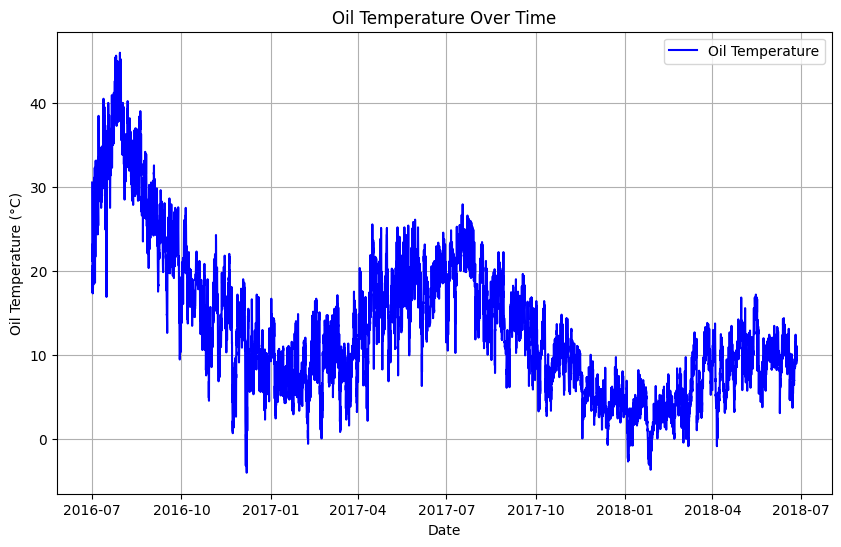

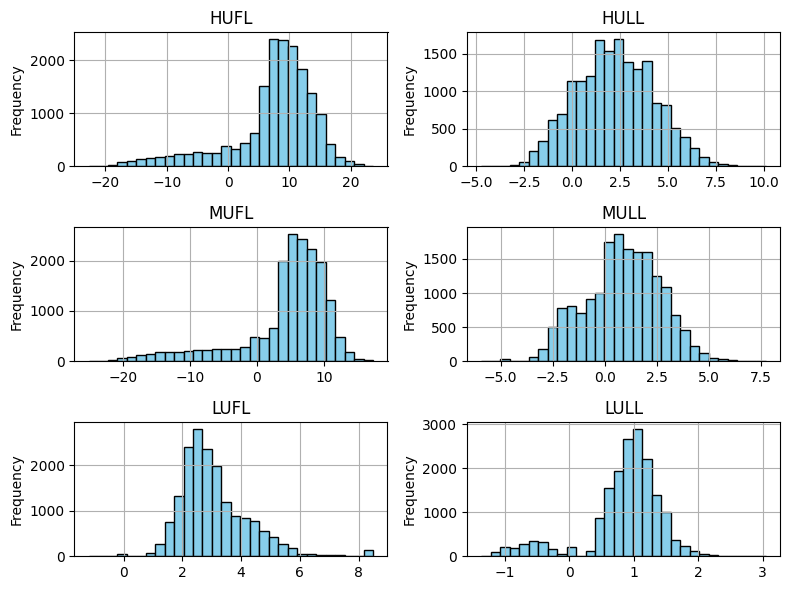

In [14]:
import matplotlib.pyplot as plt

# Plotting the oil temperature over time
plt.figure(figsize=(10, 6))
plt.plot(pd.to_datetime(data['date']), data['OT'], label='Oil Temperature', color='blue')
plt.title('Oil Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Oil Temperature (°C)')
plt.legend()
plt.grid(True)
plt.show()

# Plotting histograms for the other parameters to understand their distributions
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(8, 6))
cols = ['HUFL', 'HULL', 'MUFL', 'MULL', 'LUFL', 'LULL']
for i, ax in enumerate(axes.flatten()):
    ax.hist(data[cols[i]], bins=30, color='skyblue', edgecolor='black')
    ax.set_title(cols[i])
    ax.set_ylabel('Frequency')
    ax.grid(True)

fig.tight_layout()
plt.show()


In [15]:
missing_values = data.isnull().sum()
missing_values

,0
date,0
HUFL,0
HULL,0
MUFL,0
MULL,0
LUFL,0
LULL,0
OT,0


In [16]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# Converting date column to datetime
data['date'] = pd.to_datetime(data['date'])

# Extracting time-based features
data['hour'] = data['date'].dt.hour
data['day_of_week'] = data['date'].dt.dayofweek
data['month'] = data['date'].dt.month

# Normalizing and scaling numerical features excluding 'date'
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data[['HUFL', 'HULL', 'MUFL', 'MULL', 'LUFL', 'LULL']])
scaled_df = pd.DataFrame(scaled_features, columns=['HUFL', 'HULL', 'MUFL', 'MULL', 'LUFL', 'LULL'])

data_scaled = pd.concat([data[['date', 'OT', 'hour', 'day_of_week', 'month']], scaled_df], axis=1)

# Creating lagged features for oil temperature
for lag in [1, 2, 3, 24]:  # lagging by 1, 2, 3 hours and 24 hours (1 day)
    data_scaled[f'OT_lag_{lag}'] = data_scaled['OT'].shift(lag)

# Removing rows with NaN values created due to lagging
data_scaled.dropna(inplace=True)

data_scaled.head()


,date,OT,hour,day_of_week,month,HUFL,HULL,MUFL,MULL,LUFL,LULL,OT_lag_1,OT_lag_2,OT_lag_3,OT_lag_24
24,2016-07-02 00:00:00,21.104000,0,5,7,-0.304369,0.410696,-0.234260,0.239566,-0.540212,1.110975,19.768000,18.009001,18.009001,30.531000
25,2016-07-02 01:00:00,19.697001,1,5,7,-0.313849,0.377889,-0.208332,0.258911,-0.619218,0.959190,21.104000,19.768000,18.009001,27.787001
26,2016-07-02 02:00:00,20.049000,2,5,7,-0.313849,0.443502,-0.208332,0.337397,-0.671602,0.959190,19.697001,21.104000,19.768000,27.787001
27,2016-07-02 03:00:00,20.752001,3,5,7,-0.313849,0.410696,-0.203059,0.337397,-0.749749,0.907484,20.049000,19.697001,21.104000,25.044001
28,2016-07-02 04:00:00,21.385000,4,5,7,-0.399027,0.410696,-0.270734,0.337397,-0.749749,0.907484,20.752001,20.049000,19.697001,21.948000


**LSTM model**

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


194/194 - 4s - 22ms/step - loss: 183.1786 - val_loss: 6.6617
Epoch 2/20
194/194 - 1s - 5ms/step - loss: 63.0881 - val_loss: 6.4937
Epoch 3/20
194/194 - 1s - 7ms/step - loss: 42.2228 - val_loss: 3.2548
Epoch 4/20
194/194 - 1s - 4ms/step - loss: 32.6901 - val_loss: 2.4574
Epoch 5/20
194/194 - 1s - 4ms/step - loss: 26.1272 - val_loss: 2.9558
Epoch 6/20
194/194 - 1s - 4ms/step - loss: 22.0778 - val_loss: 2.3217
Epoch 7/20
194/194 - 2s - 9ms/step - loss: 19.1573 - val_loss: 3.2907
Epoch 8/20
194/194 - 1s - 7ms/step - loss: 17.4364 - val_loss: 2.6176
Epoch 9/20
194/194 - 1s - 4ms/step - loss: 16.5110 - val_loss: 2.7831
Epoch 10/20
194/194 - 1s - 4ms/step - loss: 14.8643 - val_loss: 2.6842
Epoch 11/20
194/194 - 1s - 7ms/step - loss: 14.6341 - val_loss: 3.3260
Epoch 12/20
194/194 - 1s - 6ms/step - loss: 13.7780 - val_loss: 2.3918
Epoch 13/20
194/194 - 1s - 4ms/step - loss: 13.1994 - val_loss: 2.3736
Epoch 14/20
194/194 - 1s - 7ms/step - loss: 12.7211 - val_loss: 1.9536
Epoch 15/20
194/194 - 1s

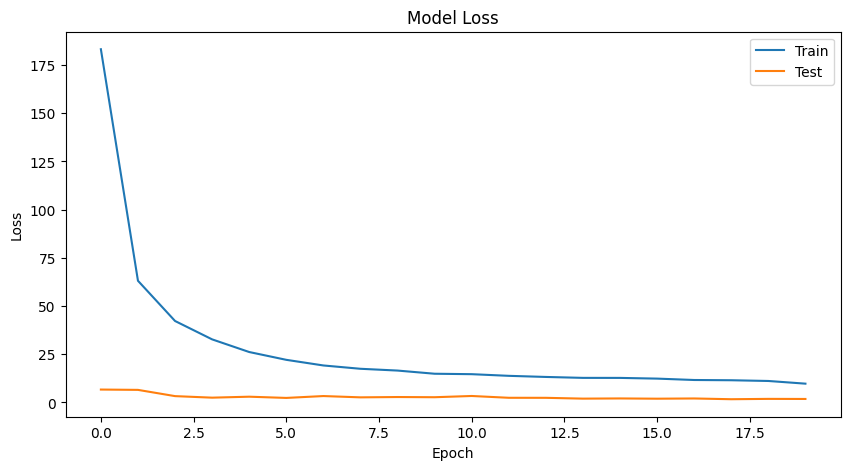

In [17]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Preparing input features and target variable
X = data_scaled.drop(['date', 'OT'], axis=1).values
y = data_scaled['OT'].values

# Reshape X to be [samples, time steps, features] which is required for LSTM
X = X.reshape((X.shape[0], 1, X.shape[1]))

# Splitting the dataset into training (80%) and testing (20%) sets
train_size = int(len(X) * 0.8)
test_size = len(X) - train_size
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Building the LSTM Model layers
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(1)
])

# Compiling the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

history = model.fit(X_train, y_train, epochs=20, batch_size=72, validation_data=(X_test, y_test), verbose=2, shuffle=False)

plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Test')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()


**ARIMA Model**

In [18]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np

# We need to prepare the data specifically for ARIMA, which doesn't use the reshaped data or additional features like LSTM
# For ARIMA, we'll just use the 'OT' column as it is a univariate time series model
ot_data = data_scaled['OT'].values

# Split the data into training and testing sets
train_size = int(len(ot_data) * 0.8)
ot_train, ot_test = ot_data[:train_size], ot_data[train_size:]

# Fit the ARIMA model (p=5, d=1, q=0) based on initial assumption and ACF/PACF plots we might have observed earlier
model = ARIMA(ot_train, order=(5,1,0))
model_fit = model.fit()

# Forecast
forecast = model_fit.forecast(steps=len(ot_test))
mse = mean_squared_error(ot_test, forecast)

# Displaying the MSE and plot the forecast against the actual values
mse, forecast, ot_test


(28.35122404967984,
 array([3.65445477, 3.66794002, 3.66130836, ..., 3.6661396 , 3.6661396 ,
        3.6661396 ]),
 array([ 3.30599999,  3.65799999,  4.29099989, ..., 10.27099991,
         9.77799988,  9.56700039]))

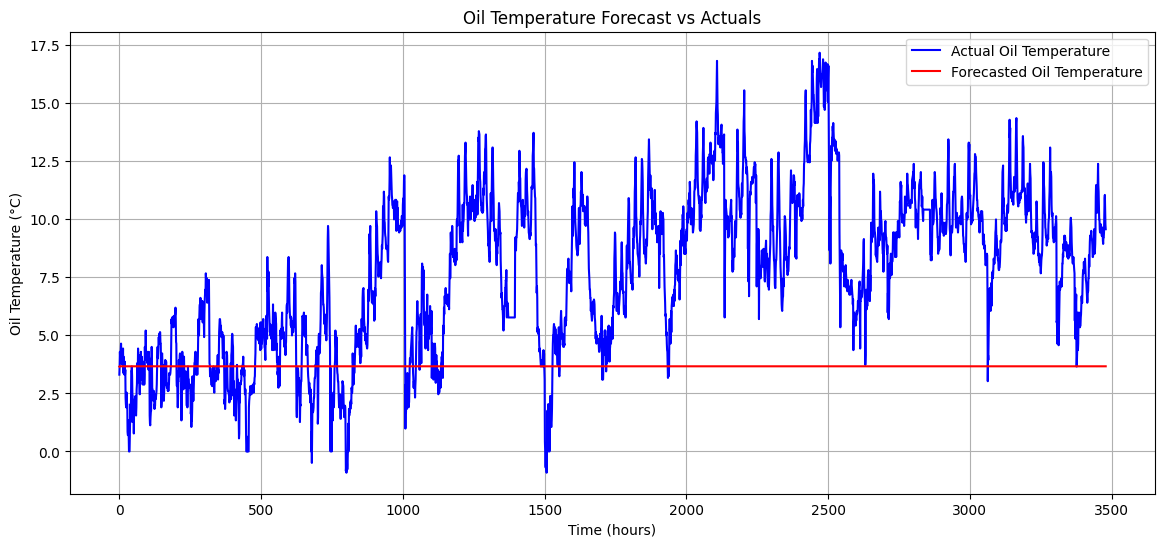

In [19]:
# Plotting the forecast against actual values
plt.figure(figsize=(14, 6))
plt.plot(ot_test, label='Actual Oil Temperature', color='blue')
plt.plot(forecast, label='Forecasted Oil Temperature', color='red')
plt.title('Oil Temperature Forecast vs Actuals')
plt.xlabel('Time (hours)')
plt.ylabel('Oil Temperature (°C)')
plt.legend()
plt.grid(True)
plt.show()


**GRU Model**

In [20]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import RootMeanSquaredError

In [21]:
# Preparing input features and target variable
X = data_scaled.drop(['date', 'OT'], axis=1).values
y = data_scaled['OT'].values

# Reshape X to be [samples, time steps, features] which is required for LSTM
X = X.reshape((X.shape[0], 1, X.shape[1]))

# Splitting the dataset into training (80%) and testing (20%) sets
train_size = int(len(X) * 0.8)
test_size = len(X) - train_size
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

model = Sequential([
    GRU(64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    GRU(50),
    Dropout(0.2),
    Dense(1)
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

model.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_test, y_test), verbose=2)

# Evaluating the model using RMSE
rmse = RootMeanSquaredError()
predictions = model.predict(X_test)
rmse.update_state(y_test, predictions)

# Output the RMSE
print('Root Mean Squared Error:', rmse.result().numpy())

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


218/218 - 5s - 23ms/step - loss: 86.3012 - val_loss: 6.4384
Epoch 2/20
218/218 - 2s - 10ms/step - loss: 22.1598 - val_loss: 1.6110
Epoch 3/20
218/218 - 1s - 5ms/step - loss: 12.5531 - val_loss: 1.0341
Epoch 4/20
218/218 - 1s - 6ms/step - loss: 8.2605 - val_loss: 0.6893
Epoch 5/20
218/218 - 1s - 7ms/step - loss: 6.0153 - val_loss: 0.7005
Epoch 6/20
218/218 - 2s - 9ms/step - loss: 5.0056 - val_loss: 0.6463
Epoch 7/20
218/218 - 1s - 4ms/step - loss: 4.5177 - val_loss: 0.5412
Epoch 8/20
218/218 - 1s - 5ms/step - loss: 4.0889 - val_loss: 0.7074
Epoch 9/20
218/218 - 1s - 5ms/step - loss: 3.8656 - val_loss: 1.0734
Epoch 10/20
218/218 - 1s - 5ms/step - loss: 3.7698 - val_loss: 0.4959
Epoch 11/20
218/218 - 1s - 4ms/step - loss: 3.5780 - val_loss: 0.6613
Epoch 12/20
218/218 - 1s - 6ms/step - loss: 3.4637 - val_loss: 0.6159
Epoch 13/20
218/218 - 1s - 4ms/step - loss: 3.4256 - val_loss: 0.5866
Epoch 14/20
218/218 - 1s - 4ms/step - loss: 3.2430 - val_loss: 0.7017
Epoch 15/20
218/218 - 1s - 7ms/step

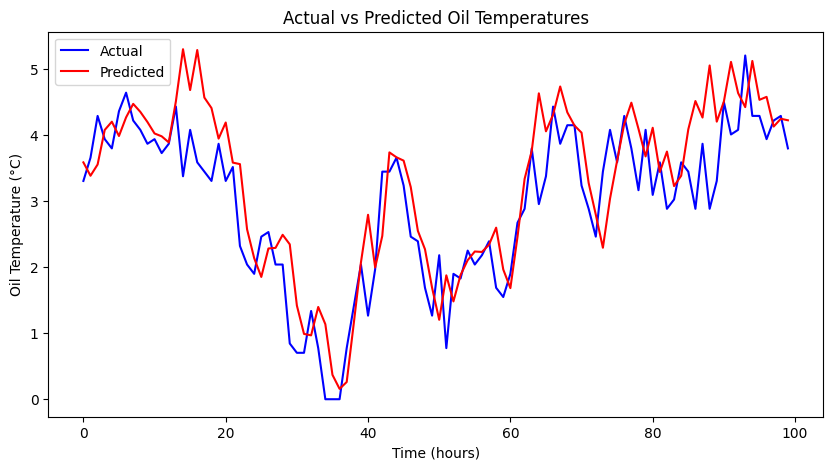

In [22]:
# Predictions are already stored in 'predictions'
plt.figure(figsize=(10, 5))
plt.plot(y_test[:100], label='Actual', color='blue')  # Plot first 100 points for clarity
plt.plot(predictions[:100], label='Predicted', color='red')
plt.title('Actual vs Predicted Oil Temperatures')
plt.xlabel('Time (hours)')
plt.ylabel('Oil Temperature (°C)')
plt.legend()
plt.show()


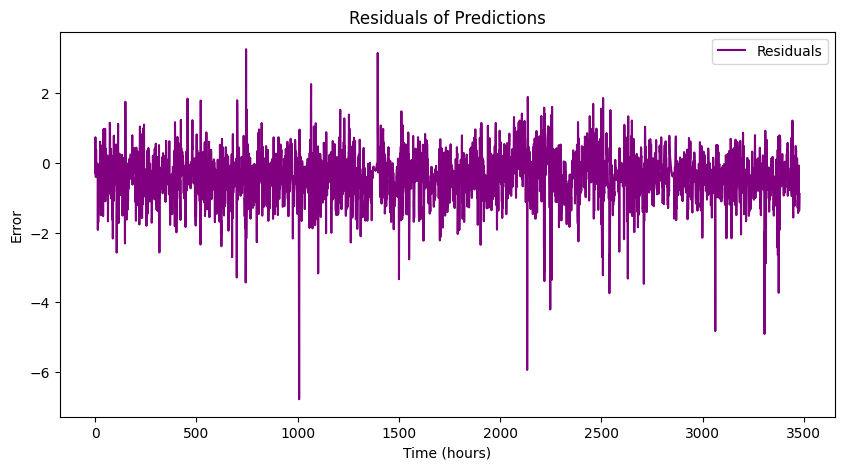

In [23]:
residuals = y_test - predictions.flatten()

plt.figure(figsize=(10, 5))
plt.plot(residuals, label='Residuals', color='purple')
plt.title('Residuals of Predictions')
plt.xlabel('Time (hours)')
plt.ylabel('Error')
plt.legend()
plt.show()


In [24]:
from sklearn.metrics import mean_absolute_error, r2_score

mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print('Mean Absolute Error:', mae)
print('R² Score:', r2)


Mean Absolute Error: 0.6012674172462403
R² Score: 0.9454062696746012
